# Chapter 1: Introduction

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> * Edits and additional content added by Dr. T. Smith (timsmith@iastate.edu) (Fall, 2020)

In [53]:
# the following "magic" command will result in displaying all figures inside the notebook 
# note: in most notbook installations, this is usually the default, but it is good to make sure)
%matplotlib inline 

import pandas as pd # libarary for dataframes (and other)
import matplotlib.pylab as plt # library for graphing/plotting figures


## Figure 1.1

Let's load the data. This data records three features (Income, Lot_Size and Riding Mower Ownership of a sample of 24 home owners.


In [54]:
mower_df = pd.read_csv("https://github.com/timcsmith/MIS536-Public/raw/master/Data/RidingMowers.csv") # load the data (you will need to ensure the csv file is in your colab folder)
mower_df.head(8) # head displays a number of records (observations). Here, 8 will be displayed. If no number is given, the default is 5.

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner


## Create a visualization of the data

Use matplotlib to create two visualizations; and models (we will discuss "models" in greater depth at a later time).

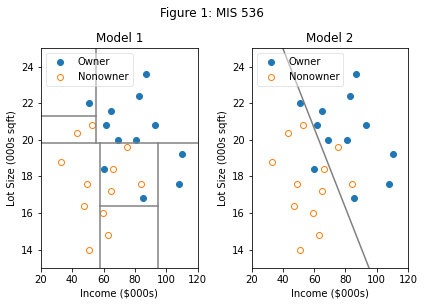

In [55]:
#########################
# STEP1 - Create the drawing area in which we will place of plots
#########################

fig = plt.figure() # this creates a figure - sort of a drawing space to create our plot

fig.suptitle("Figure 1: MIS 536", multialignment='center', wrap=True, y=1.05) # add centered title to figure 
# more on subtitle here https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.suptitle.html
# note the use of y=1.1 in the above. The y (and x) coordinates in a figure go from 0 to 1. If we provide a value greater than 1, 
# we are displaying further aware from the figure - in this case, a value of 1.05 provide more space between the
# title on the plots below. You can adjust this value to match your own taste. 

#########################
# STEP2: Create two subplot areas
#########################

####
# STEP2a - Create First subplot (ax1)

# create a 1x2 plot area, and create a subplot area situated in the first location (to the left)
ax1 = fig.add_subplot(121, title="Model 1") # within a 1x2 grid, add ax1 as the first plot
# more on add_subplot here https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

# now, we draw the subplot (ax1) by creating a scatter plot of our data

# here we select only the records in our data that are "owners" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0', ax=ax1)

# here we select only the records in our data that are "Nonowner" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1', ax=ax1)

# add legend and and axes data
ax1.legend(["Owner", "Nonowner"], framealpha=0.5);
ax1.set_xlim((20, 120))
ax1.set_ylim((13, 25))
ax1.set_xlabel('Income ($000s)')
ax1.set_ylabel('Lot Size (000s sqft)')

# now, draw a predictive (decision tree) model on plot1
y0, y1, y2 = 21.3, 19.8, 16.4
x0, x1, x2 = 55, 58, 95
ax1.plot((20, x0), (y0,y0), color='grey')
ax1.plot((20, 120), (y1,y1), color='grey')
ax1.plot((x1, x2), (y2,y2), color='grey')
ax1.plot((x0, x0), (25,y1), color='grey')
ax1.plot((x1, x1), (y1,13), color='grey')
ax1.plot((x2, x2), (y1,13), color='grey')

####
# Step 2b: Create second subplot (ax2)

# within a 1x2 plot area (1 row, 2 columns), and create a subplot area situated in the second location (to the right)
ax2 = fig.add_subplot(122, title="Model 2") # within a 1x2 grid, add ax1 as the first plot

# here we select only the records in our data that are "Nonowner" of mowers..
# then add a scatter plot of this data to our figure
mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0', ax=ax2)
mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1', ax=ax2)
# add legend and and axes data


ax2.legend(["Owner", "Nonowner"], framealpha=0.5);
ax2.set_xlim((20, 120))
ax2.set_ylim((13, 25))
ax2.set_xlabel('Income ($000s)')
ax2.set_ylabel('Lot Size (000s sqft)')

# now, draw a predictive (linear) model on plot1
ax2.plot((40, 95), (25,13), color='grey')

####################
# Step3: Display the figure to the screen and save a copy to a file graphics file to be used later in a report (or other)
####################

# Set the layout style of the figure
fig.tight_layout()
# Safe a copy of the figure to a file (can be used to insert into a word document, or other)
fig.savefig("fig01.png", format="png")
# display the figure to the screen
fig.show()
